## Fashion MNIST dataset Hyperparameter Optimization using Tensorflow

<b>Fashion MNIST dataset</b>

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

Label and Description<br><br>
0	T-shirt/top<br>
1	Trouser<br>
2	Pullover<br>
3	Dress<br>
4	Coat<br>
5	Sandal<br>
6	Shirt<br>
7	Sneaker<br>
8	Bag<br>
9	Ankle boot<br>

In [133]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf#tensorflow
import matplotlib.pyplot as plt

In [134]:
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)

In [135]:
#checking the version of tensorflow
tf.__version__

'2.5.0'

In [136]:
#Loading the mnist fashion Dataset

In [137]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [138]:
print(x_train.shape)#checkig the shape of the X_train
print(y_train.shape)#checkig the shape of the y_train
print(x_test.shape)#checkig the shape of the X_test
print(y_test.shape)#checkig the shape of the y_test

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [139]:
#lets comare an xtrain and ytrain sample

Label: 9


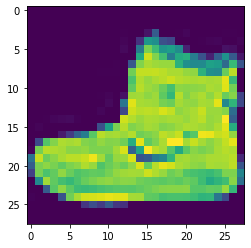

In [140]:
print('Label:' , y_train[0])#9 is the Ankle boot
plt.imshow(x_train[0])

In [141]:
#Reshape train and test sets into compatible shapes

In [142]:
x_train1=x_train.reshape(60000, 28*28)
x_train1.shape

(60000, 784)

In [143]:
x_test1=x_test.reshape(10000, 28*28)
x_test1.shape

(10000, 784)

In [144]:
#Normalize the data so that data is in range 0-1

In [145]:
x_train2=x_train1/255.0
x_test2=x_test1/255.0

In [146]:
x_train2.shape,x_test2.shape

((60000, 784), (10000, 784))

In [147]:
# One-hot encode the class vector

In [148]:
from tensorflow.keras.utils import to_categorical#Converts a class label (integers) to binary class matrix.
y_train2=to_categorical(y_train,num_classes=10)
y_test2=to_categorical(y_test,num_classes=10)

In [149]:
print(y_train[1])
y_train2[1]# 0 will be denoted in the below foramt

0


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [150]:
#Model Building

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers, optimizers

In [152]:
def train_test_model(iterations,Learning_rate,Lambda):
    iterations=iterations
    lr=Learning_rate
    lamda=Lambda
    model=Sequential() #defined the model
    model.add(Flatten())#Flattens the input.
    model.add(Dense(units=128,activation='relu',input_shape=(784,)))
    model.add(Dense(units=64,activation='relu'))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    sgd=optimizers.SGD(lr)
    model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train2,y_train2,batch_size=1000,epochs=iterations,verbose=0)
    print(model.evaluate(x_train2,y_train2))
    print(model.evaluate(x_test2,y_test2))

In [153]:
#Lambda(Regularization)

In [154]:
Learning_rate=0.001
Lambda=0
train_test_model(100,Learning_rate,Lambda)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.6502 - accuracy: 0.7821
[0.6502208113670349, 0.7821333408355713]
313/313 [==============================] - 2s 4ms/step - loss: 0.6687 - accuracy: 0.7709: 0s - loss: 0.670
[0.6687406897544861, 0.7709000110626221]


In [155]:
# we can change the values of learning rate and lambda to aquire the best accuracy and low loss

In [158]:
##Coarse tune

In [159]:
import math
for k in range(1,10):
    Learning_rate=math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda=math.pow(10, np.random.uniform(-7,-2))
    best_acc=train_test_model(50,Learning_rate,Lambda)
    print('k:',k)
    print('epocs:',50)
    #print('accuracy:',best_acc)
    print('Learning_rate (Alpha ):',Learning_rate)
    print('Regularization (Lambda):',Lambda)
    print()
    print()

1875/1875 [==============================] - 5s 2ms/step - loss: 11.4759 - accuracy: 0.1000
[11.475930213928223, 0.10000000149011612]
313/313 [==============================] - 1s 3ms/step - loss: 11.4759 - accuracy: 0.1000
[11.475929260253906, 0.10000000149011612]
k: 1
epocs: 50
Learning_rate (Alpha ): 46.626490521617406
Regularization (Lambda): 0.00030560442368064846


1875/1875 [==============================] - 6s 3ms/step - loss: 2.2694 - accuracy: 0.1435
[2.2693848609924316, 0.14354999363422394]
313/313 [==============================] - 2s 4ms/step - loss: 2.2720 - accuracy: 0.1452
[2.2719531059265137, 0.1451999992132187]
k: 2
epocs: 50
Learning_rate (Alpha ): 1.038203005986979e-05
Regularization (Lambda): 0.0015799983259413553


1875/1875 [==============================] - 6s 3ms/step - loss: 2.3055 - accuracy: 0.1164
[2.3055124282836914, 0.11641667038202286]
313/313 [==============================] - 2s 4ms/step - loss: 2.3040 - accuracy: 0.1148
[2.3039638996124268, 0.11479999

In [160]:
#Keras Tuner

In [161]:
def run_finer_tune_model(learning_rate,activation, dropout_rate,initializer,num_unit):
    model = Sequential()
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation, input_shape=(784,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax'))
    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [162]:
learning_rate = [0.1, 0.001, 0.02][:1]
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]
dropout_rate = [0.3, 0.2, 0.8][:1]
initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]
num_unit = [10, 5][:1]
batch_size = [20, 50, 100][:1]
epochs = [1, 20, 50][:1]

In [163]:
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  learning_rate=learning_rate,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  activation = activation)

In [164]:
model =tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=run_finer_tune_model, verbose=0)

In [165]:
from sklearn.model_selection import GridSearchCV
models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

In [166]:
x_train.shape

(60000, 28, 28)

In [167]:
y_train.shape

(60000,)

In [168]:
best_model = models.fit(x_train2,y_train2)
print('Best model :',best_model.best_params_)

Best model : {'activation': 'relu', 'batch_size': 20, 'dropout_rate': 0.3, 'epochs': 1, 'initializer': 'lecun_uniform', 'learning_rate': 0.1, 'num_unit': 10}


In [ ]:
#--------------------------------------------END-------------------------------------------------------------------#